## Task 3---Forecast of the Number of Properties  for Sale
In this task, considering that the number of properties is business behavior data that exhibits a certain period of change and the trend has a natural limit or saturation state, we can choose Facebook's time series prediction model Prophet for prediction.

In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

## Load data

In [2]:
df = pd.read_csv("../data/train.csv")
df = df.loc[df['built_year'].notnull()]


## Set target planning_area

In [3]:
#Set planning_area we are going to prodict
target='geylang'
df=df.loc[df['planning_area']==target]

## Data processing for modeling

In [4]:
# Count the number of different built_year
dict= df.groupby(['built_year'])['listing_id'].count().to_dict()
df['count'] = df['built_year'].map(dict)
df = df[['built_year','count']].rename(columns = {"built_year":"ds","count":"y"})
df.drop_duplicates(inplace=True)
df['ds'] = pd.to_datetime(df['ds'],format="%Y") #transfer the built_year into standard time
df.head()

,ds,y
51,2025-01-01,100
98,2011-01-01,3
105,1986-01-01,21
142,1979-01-01,1
149,2002-01-01,1


## Predict
Use the Prophet to fit data and make prediction

In [5]:
m = Prophet(changepoint_prior_scale=0.8, interval_width=0.3,yearly_seasonality=12)
m.fit(df)

18:14:02 - cmdstanpy - INFO - Chain [1] start processing
18:14:03 - cmdstanpy - INFO - Chain [1] done processing


C:\Users\Seven\AppData\Local\Temp\ipykernel_20304\116002683.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction['yhat_lower'].loc[prediction['yhat_lower']<0]=0 # restric the minmum of predict


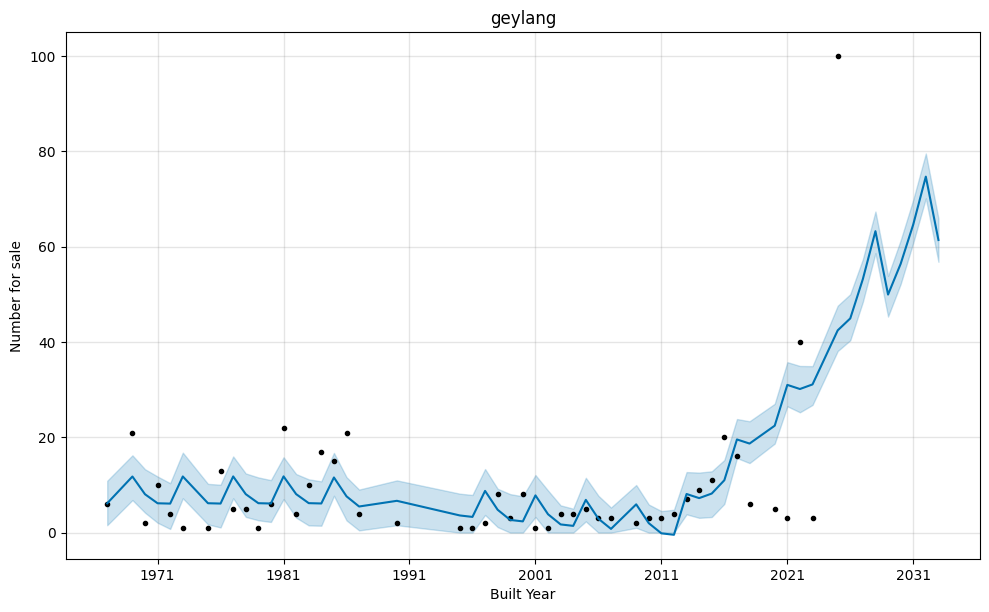

In [6]:
future = m.make_future_dataframe(periods=8, freq='Y') # range of prediction
prediction = m.predict(future)
prediction['yhat_lower'].loc[prediction['yhat_lower']<0]=0 # restric the minmum of predict
# Format the chart
m.plot(prediction)
plt.title(target)
plt.xlabel("Built Year")
plt.ylabel("Number for sale")
ax=plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()